## Setup

### Projeto:Projeto: Predição de Qualidade de Vinhos


https://docs.google.com/document/d/1hS0iCUgO9LRToOFXFAwGWliQhhXMQZOYplqzqnPYYLE/edit?tab=t.0#heading=h.pbhku9c46yvu

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
# importando os databases
# vinho_tinto = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
# vinho_branco = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
tinto = pd.read_csv(url, sep=';')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
branco = pd.read_csv(url, sep=';')


## Tratamento

In [ ]:
tinto.drop_duplicates(inplace=True)
branco.drop_duplicates(inplace=True)

In [ ]:
branco.head() #verifiquei que há dados duplicados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_Categoria
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [ ]:
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade_Categoria,qual_tinto
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0


In [ ]:
tinto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  qualidade_Categoria   1359 non-null   category
 13  qual_tinto            1359 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 173.2 KB


In [ ]:
branco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         3961 non-null   float64 
 1   volatile acidity      3961 non-null   float64 
 2   citric acid           3961 non-null   float64 
 3   residual sugar        3961 non-null   float64 
 4   chlorides             3961 non-null   float64 
 5   free sulfur dioxide   3961 non-null   float64 
 6   total sulfur dioxide  3961 non-null   float64 
 7   density               3961 non-null   float64 
 8   pH                    3961 non-null   float64 
 9   sulphates             3961 non-null   float64 
 10  alcohol               3961 non-null   float64 
 11  quality               3961 non-null   int64   
 12  qualidade_Categoria   1144 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 406.3 KB


In [ ]:
def qualidade_Categoria(x):
    if x < 7:
        return 0
    else:
        return 1

tinto['qualidade_Categoria'] = tinto['quality'].apply(qualidade_Categoria)
branco['qualidade_Categoria'] = branco['quality'].apply(qualidade_Categoria) # categorizei a categoria qualidade do vinho Branco (achei melhor essa)

In [ ]:
''''#aplicando as qualificações:
def qualidade_categoria(x):
    if x < 4:
        return 0
    elif x < 7:
        return 1
    else:
        return 2


tinto['qualidade_Categoria'] = tinto['quality'].apply(qualidade_categoria)
branco['qualidade_Categoria'] = branco['quality'].apply(qualidade_categoria)'''

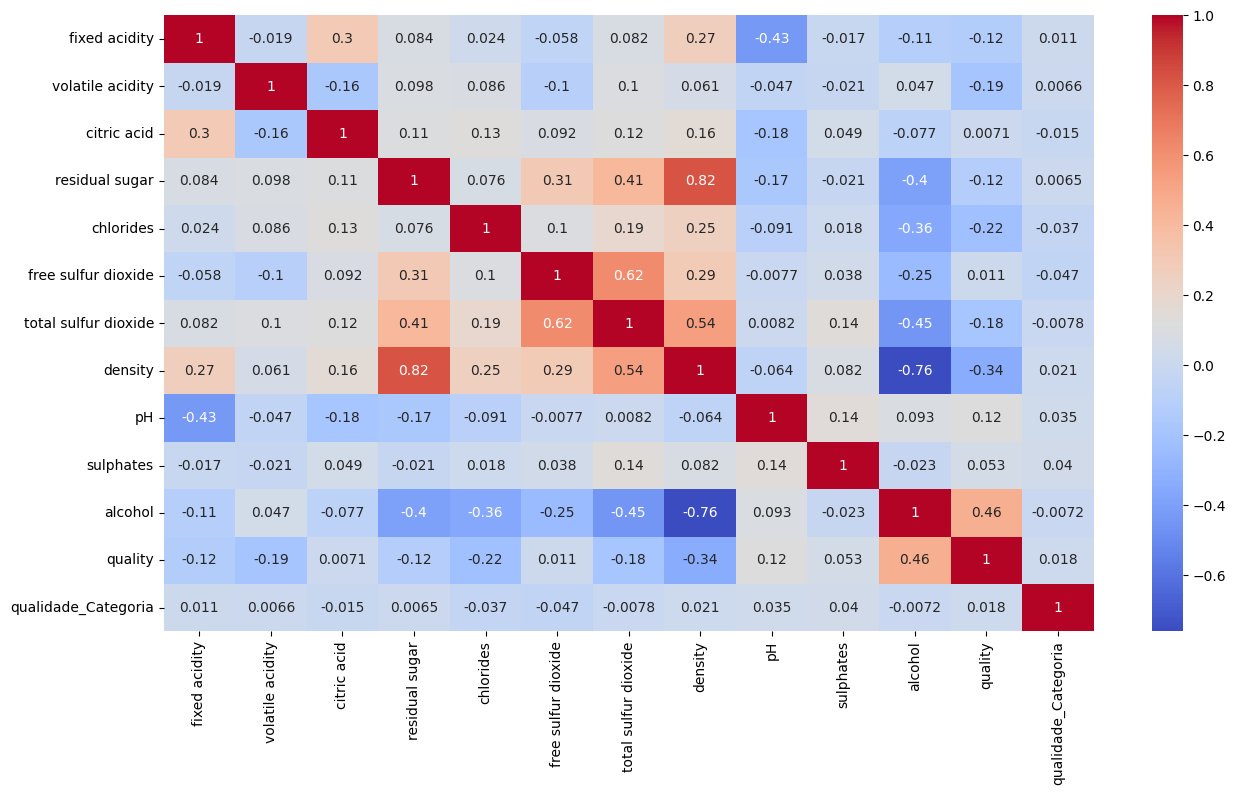

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(branco.corr(), cmap='coolwarm', annot=True) #correlação das variáveis do vinho Branco

branco['qualidade_Categoria'] = pd.qcut(tinto['quality'], 3, labels=[0, 1, 2])
tinto['qualidade_Categoria'] = pd.qcut(tinto['quality'], 3, labels=[0, 1, 2])


<Axes: >

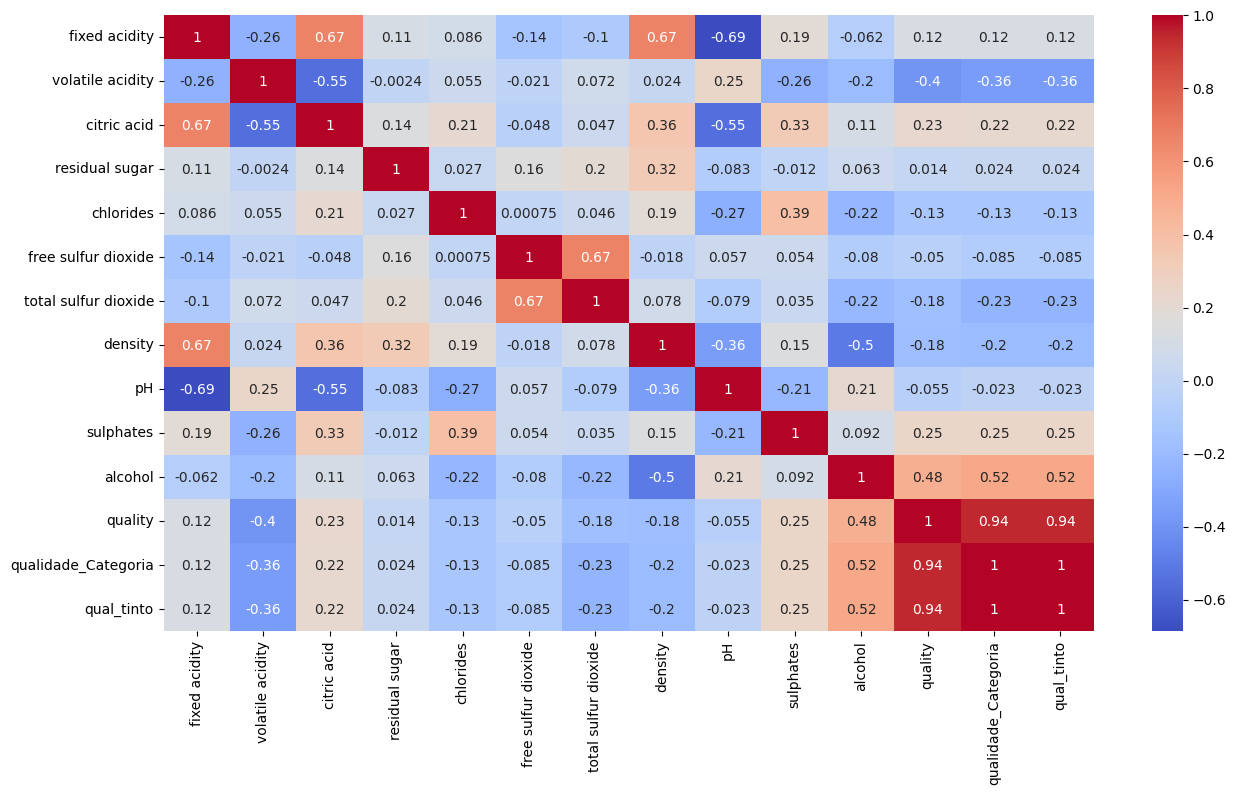

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(tinto.corr(), cmap='coolwarm', annot=True) #correlação das variáveis do vinho Tinto

In [ ]:
branco.corr()['quality']


,quality
fixed acidity,-0.124636
volatile acidity,-0.190678
citric acid,0.007065
residual sugar,-0.117339
chlorides,-0.217739
free sulfur dioxide,0.010507
total sulfur dioxide,-0.183356
density,-0.337805
pH,0.123829
sulphates,0.053200


In [ ]:
tinto.corr()['quality']

,quality
fixed acidity,0.119024
volatile acidity,-0.395214
citric acid,0.228057
residual sugar,0.013640
chlorides,-0.130988
free sulfur dioxide,-0.050463
total sulfur dioxide,-0.177855
density,-0.184252
pH,-0.055245
sulphates,0.248835


### Projeto de Predição de Qualidade de Vinhos


## Regressão Linear

In [ ]:
#Importando Bibliotecas

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Regressão Linear - Vinho tinto
R²: 0.883277903555586
RMSE: 0.28105519199464096

Árvore de Decisão Regressora - Vinho tinto
R²: 0.8044294527539835
RMSE: 0.36380343755449945

Regressão Logística - Vinho tinto
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
Matriz de Confusão:



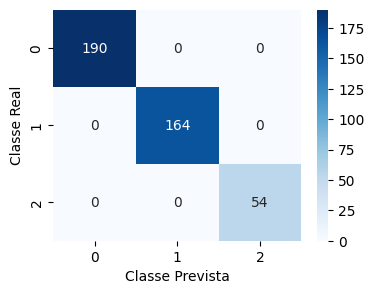


Árvore de Decisão Classificadora - Vinho tinto
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
Matriz de Confusão:



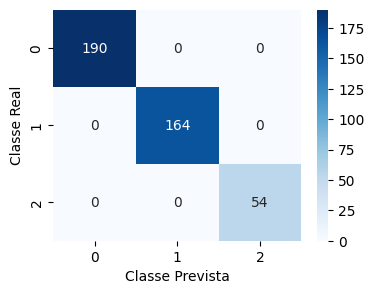

In [ ]:
# Regressão
X_tinto= tinto.drop(['quality', 'qualidade_Categoria'], axis=1)
y_tinto = tinto['quality']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_tinto, y_tinto, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train_m, y_train_m)
y_pred_lr = lr.predict(X_test_m)

print("\nRegressão Linear - Vinho tinto")
print("R²:", r2_score(y_test_m, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_lr)))

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_m, y_train_m)
y_pred_dtr = dtr.predict(X_test_m)

print("\nÁrvore de Decisão Regressora - Vinho tinto")
print("R²:", r2_score(y_test_m, y_pred_dtr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_dtr)))

# Classificação
tinto['qual_tinto'] = pd.qcut(tinto['quality'], 3, labels=[0, 1, 2])
X_qualidade_tinto = tinto.drop(['quality', 'qualidade_Categoria'], axis=1)
y_qualidade_tinto = tinto['qualidade_Categoria']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_qualidade_tinto, y_qualidade_tinto, test_size=0.3, random_state=42)

logr = LogisticRegression(max_iter=2000)
logr.fit(X_train_c, y_train_c)
y_pred_logr = logr.predict(X_test_c)

print("\nRegressão Logística - Vinho tinto")
print("Acurácia:", accuracy_score(y_test_c, y_pred_logr))
print("Precisão:", precision_score(y_test_c, y_pred_logr, average='weighted')) # para classificações multiclasse adicionei weighted
print("Recall:", recall_score(y_test_c, y_pred_logr, average='weighted'))
print("Matriz de Confusão:\n")
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test_c, y_pred_logr)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_c, y_train_c)
y_pred_dtc = dtc.predict(X_test_c)

print("\nÁrvore de Decisão Classificadora - Vinho tinto")
print("Acurácia:", accuracy_score(y_test_c, y_pred_dtc))
print("Precisão:", precision_score(y_test_c, y_pred_dtc, average='weighted'))
print("Recall:", recall_score(y_test_c, y_pred_dtc, average='weighted'))
print("Matriz de Confusão:\n")
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test_c, y_pred_dtc)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()


Regressão Linear - Branco
R²: 0.27232754235509116
RMSE: 0.7577955405772832

Árvore de Decisão Regressora - Branco
R²: -0.29487030098775624
RMSE: 1.010874430986795

Regressão Logística - Vinho Branco
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
Matriz de Confusão:



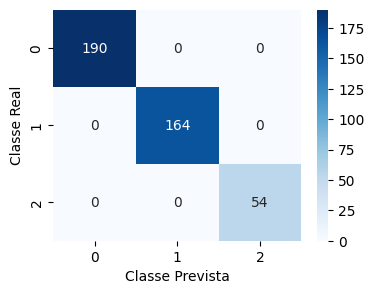


Árvore de Decisão Classificadora - Vinho tinto
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
Matriz de Confusão:



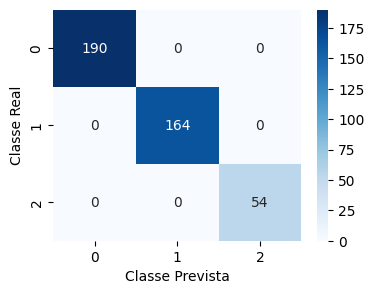

In [ ]:
# Regressão
X_tinto= branco.drop(['quality', 'qualidade_Categoria'], axis=1)
y_tinto = branco['quality']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_tinto, y_tinto, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train_m, y_train_m)
y_pred_lr = lr.predict(X_test_m)

print("\nRegressão Linear - Branco")
print("R²:", r2_score(y_test_m, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_lr)))

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_m, y_train_m)
y_pred_dtr = dtr.predict(X_test_m)

print("\nÁrvore de Decisão Regressora - Branco")
print("R²:", r2_score(y_test_m, y_pred_dtr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_dtr)))

# Classificação
tinto['qual_tinto'] = pd.qcut(tinto['quality'], 3, labels=[0, 1, 2])
X_qualidade_tinto = tinto.drop(['quality', 'qualidade_Categoria'], axis=1)
y_qualidade_tinto = tinto['qualidade_Categoria']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_qualidade_tinto, y_qualidade_tinto, test_size=0.3, random_state=42)

logr = LogisticRegression(max_iter=2000)
logr.fit(X_train_c, y_train_c)
y_pred_logr = logr.predict(X_test_c)

print("\nRegressão Logística - Vinho Branco")
print("Acurácia:", accuracy_score(y_test_c, y_pred_logr))
print("Precisão:", precision_score(y_test_c, y_pred_logr, average='weighted')) # para classificações multiclasse adicionei weighted
print("Recall:", recall_score(y_test_c, y_pred_logr, average='weighted'))
print("Matriz de Confusão:\n")
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test_c, y_pred_logr)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_c, y_train_c)
y_pred_dtc = dtc.predict(X_test_c)

print("\nÁrvore de Decisão Classificadora - Vinho tinto")
print("Acurácia:", accuracy_score(y_test_c, y_pred_dtc))
print("Precisão:", precision_score(y_test_c, y_pred_dtc, average='weighted'))
print("Recall:", recall_score(y_test_c, y_pred_dtc, average='weighted'))
print("Matriz de Confusão:\n")
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test_c, y_pred_dtc)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()